In [60]:
from fem.oned_deterministic import solve_system, L2_error
import matplotlib.pyplot as plt
from math import sin, cos, pi
import numpy as np
import seaborn as sns

In [61]:
sns.set_style('whitegrid')

In [143]:
def do_fem(f, a, b, c):
    errors = []
    XS = np.linspace(0, 1, 512)
    US = [u(x) for x in XS]

    for N in [4, 8, 16, 32, 64, 128, 256, 512]:
        # Solve the system 
        xs, U = solve_system(f, N, a, b, c)
    
        # Calculate the error
        errors.append((N, L2_error(u, U, N)))
    
        # Do a plot
        if N == 32:
            fig, ax = plt.subplots(1)
            ax.plot(XS, US, c='black', label=r'$u(x) = \sin(\pi x)$')
            ax.scatter(xs, U, facecolor='red', marker='o', s=50, linewidth=0, label=r'$u^h(x)$', alpha=1)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1.2)
            ax.legend(fontsize=18, loc=0)
        
    return errors, fig

## Define the problem

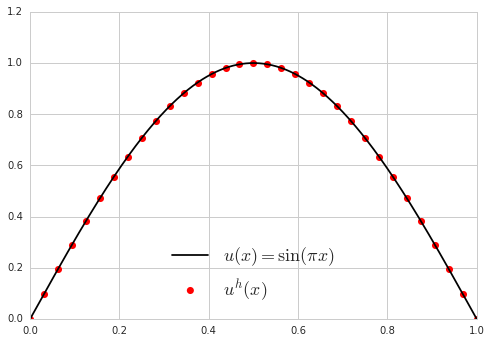

In [144]:
a, b, c = 1, 0, 0

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x)

errors, p = do_fem(f, a, b, c)

In [124]:
errors

[(4, 0.03519913325464694),
 (8, 0.009016564691422566),
 (16, 0.0022673797959945952),
 (32, 0.0005676676187006475),
 (64, 0.00014196824780205),
 (128, 3.5495269750295416e-05),
 (256, 8.874017887172983e-06),
 (512, 2.2185169567767713e-06)]

## Do FEM

In [22]:
errors

[(4, 0.03519913325464694),
 (8, 0.009016564691422566),
 (16, 0.0022673797959945952),
 (32, 0.0005676676187006475),
 (64, 0.00014196824780205),
 (128, 3.5495269750295416e-05),
 (256, 8.874017887172983e-06),
 (512, 2.2185169567767713e-06)]

## Case 2: a = 1, b = 0, c = 1

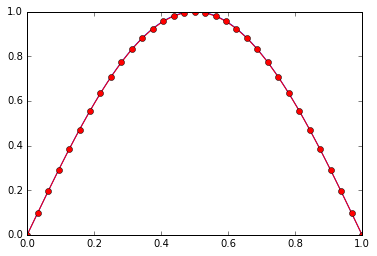

In [9]:
a, b, c = 1, 0, 1

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x) + sin(pi*x)

errors, p = do_fem(f, a, b, c)

In [10]:
errors

[(4, 0.03210786778423772),
 (8, 0.008196659393528191),
 (16, 0.002059389131447212),
 (32, 0.000515480458194226),
 (64, 0.00012890959712443404),
 (128, 3.2229865310246856e-05),
 (256, 8.057619540263114e-06),
 (512, 2.0144109879624097e-06)]

## Case 3: a = 1, b = 0, c = 10

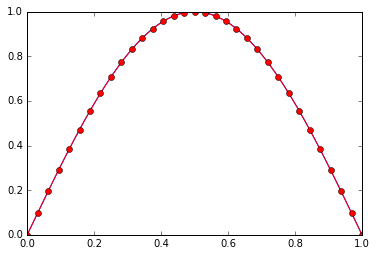

In [12]:
a, b, c = 1, 0, 10

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x) + 10*sin(pi*x)

errors, p = do_fem(f, a, b, c)

In [13]:
errors

[(4, 0.017933350471179003),
 (8, 0.004507624188346543),
 (16, 0.001128070464258532),
 (32, 0.00028208510360614385),
 (64, 7.052541211479806e-05),
 (128, 1.7631610146362113e-05),
 (256, 4.407918093675476e-06),
 (512, 1.101978625277796e-06)]

## Case 4: a = 1, b = 1, c = 0

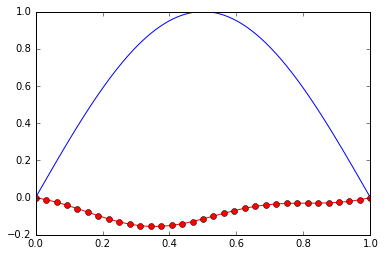

In [15]:
a, b, c = 1, 1, 0

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x) + pi*cos(pi*x)

errors, p = do_fem(f, a, b, c)